In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('../../data/water_potability.csv')

# Menjamo tako da 0 oznacava da je voda za pice, a jedinica oznacava da nije za pice
data.replace({0: 1, 1: 0}, inplace=True)

In [9]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,1
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,1
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,1
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,1


In [10]:
# Proveravamo da li postoje prazne vrednosti u podacima
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
# Brisemo NA vrednosti
data.dropna(inplace=True)

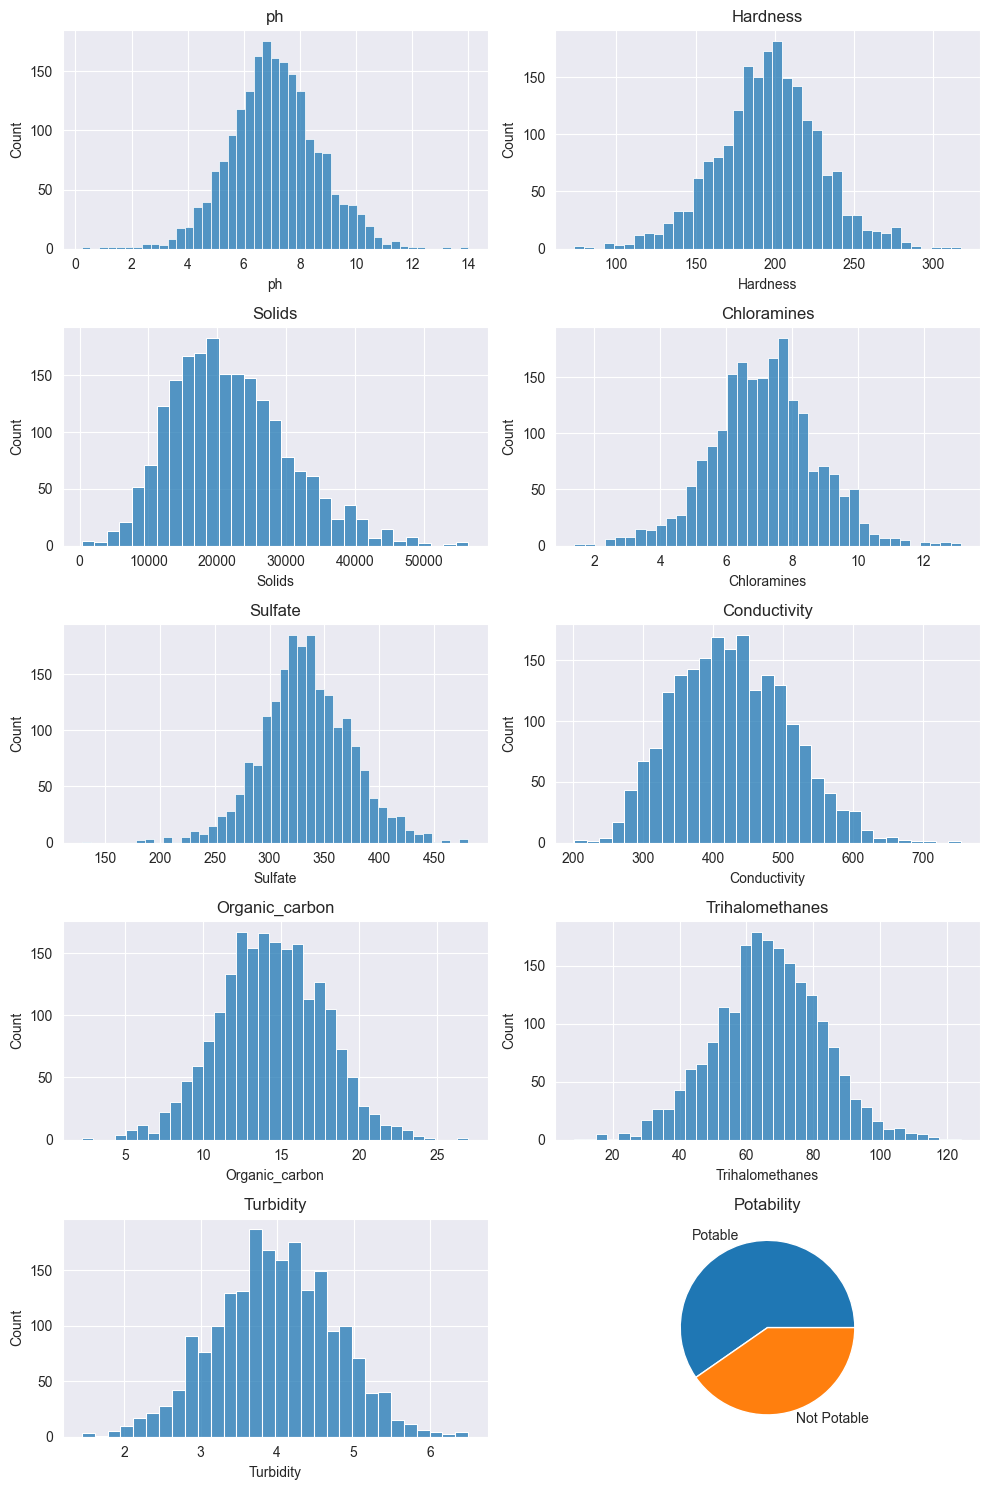

In [12]:
# Ne bi bilo lose da proverimo distribuciju svih atributa
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
for i, (col_name, ax) in enumerate(zip(data.columns, axes.flatten())):
    if col_name == 'Potability':
        pie_data = data[col_name].value_counts()
        plt.pie(pie_data, labels=['Potable', 'Not Potable'])
    else:
        sns.histplot(data[col_name], ax=ax)
    ax.set_title(f'{col_name}')

plt.tight_layout()
plt.show()

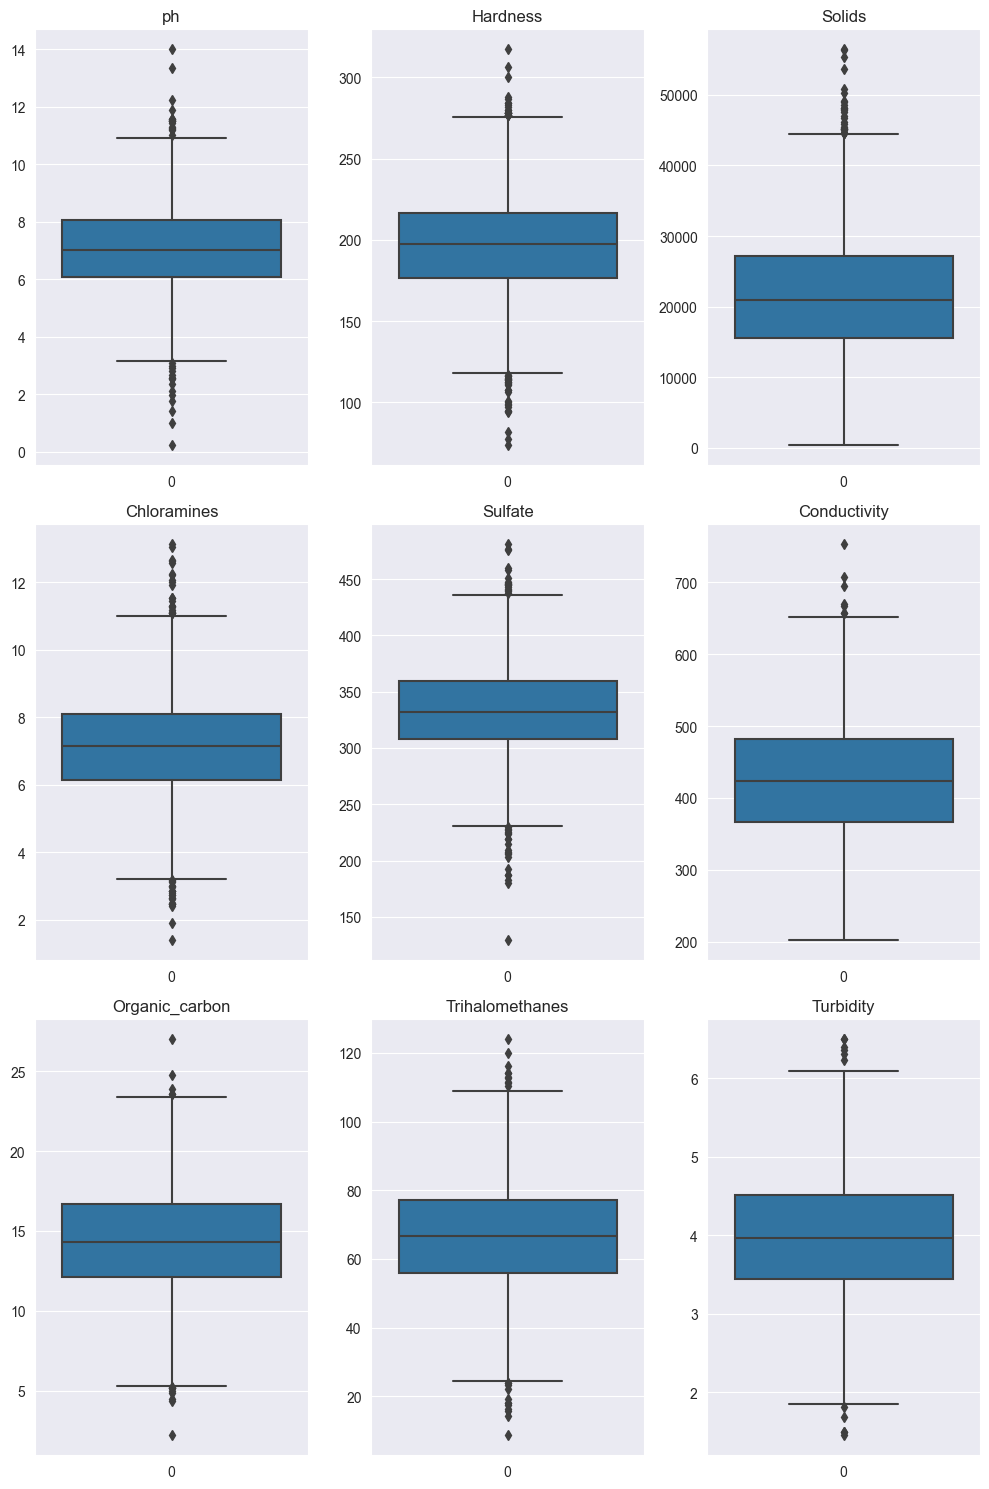

In [30]:
# TODO: Potencijalno bi trebalo otkloniti outliere
features = data.drop(['Potability'], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))
for i, (col_name, ax) in enumerate(zip(features.columns, axes.flatten())):
    sns.boxplot(features[col_name].ravel(), ax=ax)
    ax.set_title(f'{col_name}')

plt.tight_layout()
plt.show()

In [31]:
# Cuvamo podatke bez NA vrednosti
data.to_csv('../data/data.csv')